# NOAA HRES Optimum Interpolated V2 SST Data (Daily Update)

In [2]:
%matplotlib inline

In [3]:
#using xarray for data read
import xarray as xa

#using Cartopy for mapping
import matplotlib.pyplot as plt
import cmocean


/Volumes/WDC_internal/Users/bell/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(13, 8),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

***note: the homebrew version of geos/gdal/gmt conflicts with the conda version and cartopy wont work with the brew version installed*** Oct 4 2017

## Last 7 Days

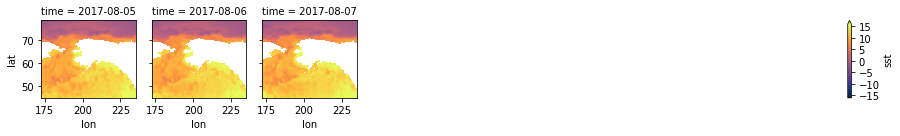

In [14]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.2017.v2.nc'

cmap = cmocean.cm.thermal
with xa.open_dataset(threddspath) as xadf:
    pd = xadf.isel(time=slice(-7,None), lat=slice(-180,-45), lon=slice(-750,-500)) #last seven days
    facet = pd['sst'].plot(x='lon', y='lat', col='time',col_wrap=7,robust=True,figsize=(14,2),cmap=cmap)

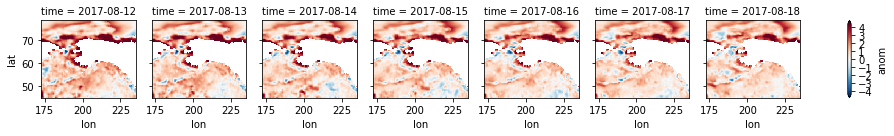

In [5]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.anom.2017.v2.nc'

cmap = cmocean.cm.thermal
with xa.open_dataset(threddspath) as xadf:
    pd = xadf.isel(time=slice(-7,NOne), lat=slice(-180,-45), lon=slice(-750,-500)) #last seven days
    facet = pd['anom'].plot(x='lon', y='lat', col='time',col_wrap=7,robust=True,figsize=(14,2))

In [ ]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.err.2017.v2.nc'

cmap = cmocean.cm.thermal
with xa.open_dataset(threddspath) as xadf:
    pd = xadf.isel(time=slice(-7,None), lat=slice(-180,-45), lon=slice(-750,-500)) #last seven days
    facet = pd['err'].plot(x='lon', y='lat', col='time',col_wrap=7,robust=True,figsize=(14,2))

In [ ]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/icec.day.mean.2017.v2.nc'

cmap = cmocean.cm.ice
with xa.open_dataset(threddspath) as xadf:
    pd = xadf.isel(time=slice(-7,None), lat=slice(-180,-45), lon=slice(-750,-500)) #last seven days
    facet = pd['icec'].plot(x='lon', y='lat', col='time',col_wrap=7,robust=True,figsize=(14,2),cmap=cmap)

## Last Day

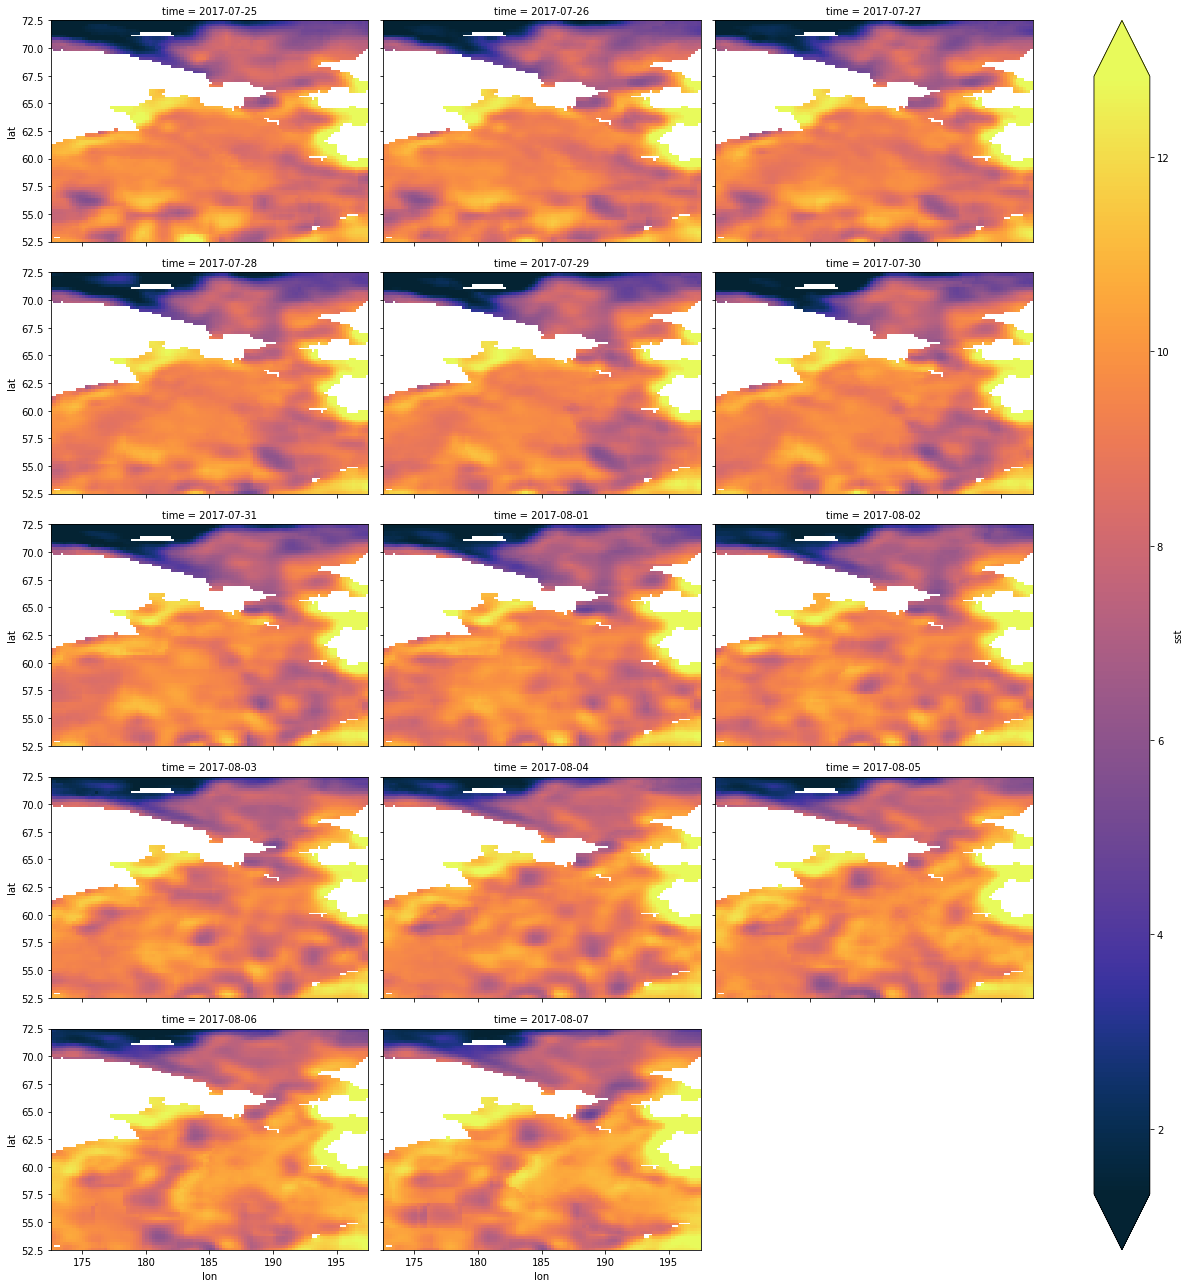

In [11]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.2017.v2.nc'

cmap = cmocean.cm.thermal
with xa.open_dataset(threddspath) as xadf:
    pd = xadf.isel(time=slice(-115,-101), lat=slice(-150,-70), lon=slice(-750,-650)) #last seven days
    facet = pd['sst'].plot(x='lon', y='lat', col='time',col_wrap=3,robust=True,figsize=(18,18),cmap=cmap)

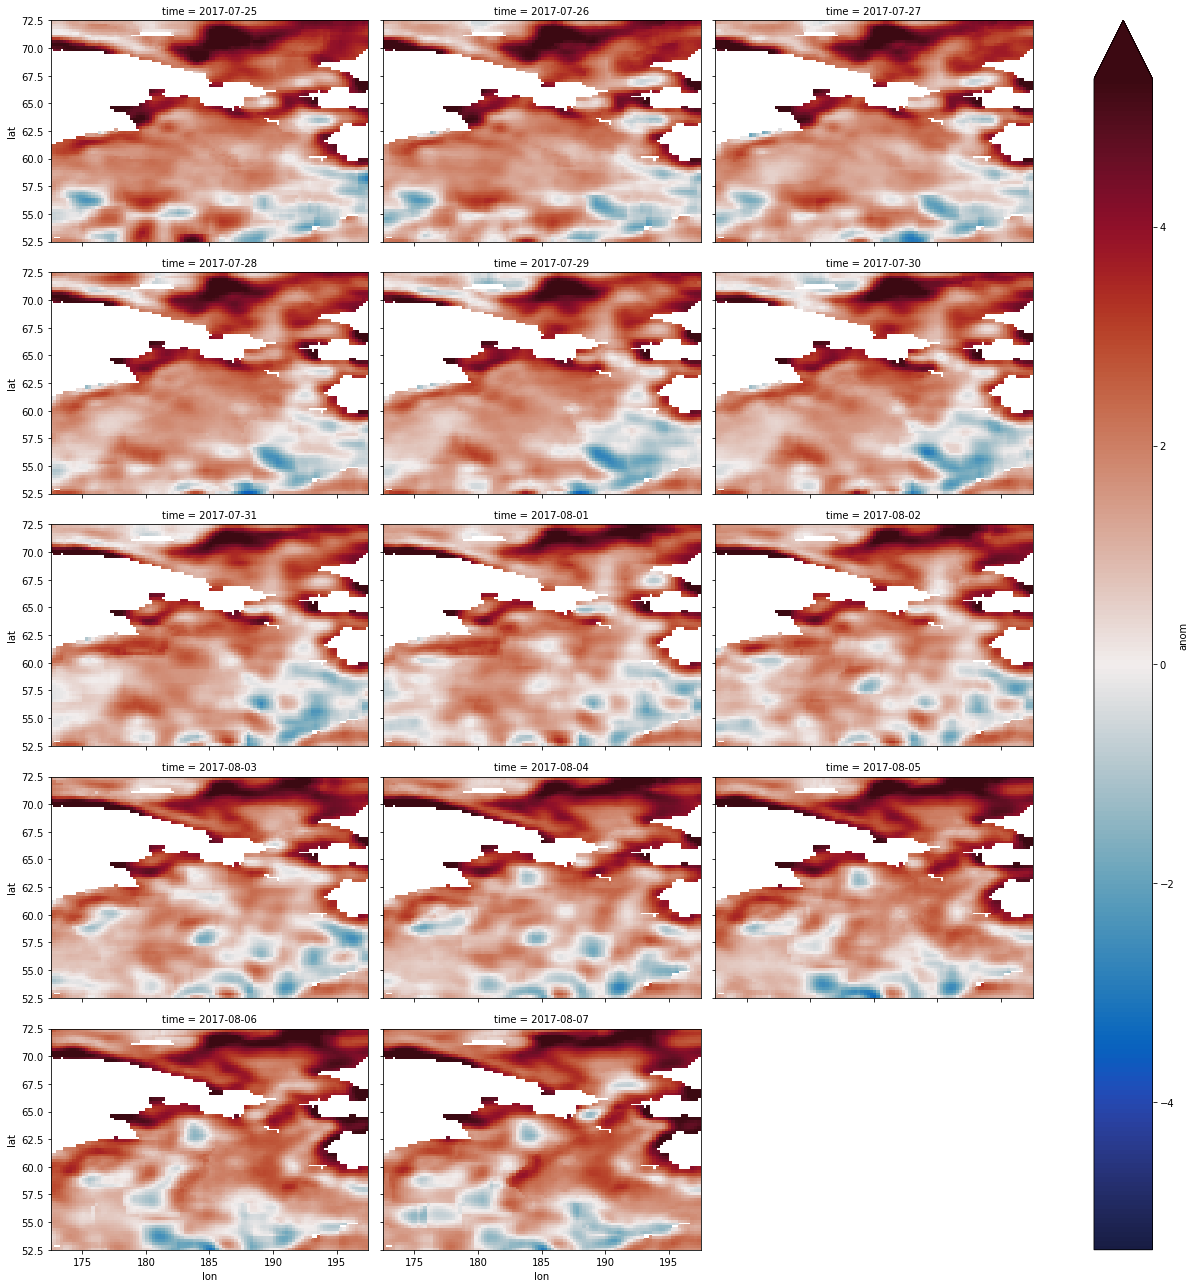

In [10]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.anom.2017.v2.nc'

cmap = cmocean.cm.balance
with xa.open_dataset(threddspath) as xadf:
    pd = xadf.isel(time=slice(-115,-101), lat=slice(-150,-70), lon=slice(-750,-650)) #last seven days
    facet = pd['anom'].plot(x='lon', y='lat', col='time',col_wrap=3,robust=True,figsize=(18,18),cmap=cmap)


### Code below will crash Jupyter... has issues to do with Cartopy... need to install a jupyter only environment

In [ ]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.anom.2017.v2.nc'

with xa.open_dataset(threddspath) as xadf:
    fig,ax = make_map(projection=ccrs.PlateCarree(-160))
    xadf['anom'].isel(time=slice(-1,None),lat=slice(-180,-45),lon=slice(-750,-500)).plot(x='lon', y='lat',robust=True,ax=ax, transform=ccrs.PlateCarree())
    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)

In [ ]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/icec.day.mean.2017.v2.nc'

cmap = cmocean.cm.ice
with xa.open_dataset(threddspath) as xadf:
    fig,ax = make_map(projection=ccrs.PlateCarree(-160))
    xadf['icec'].isel(time=-1,lat=slice(-180,-45),lon=slice(-750,-500)).plot(x='lon', y='lat',
                                                                             robust=True,ax=ax,
                                                                             transform=ccrs.PlateCarree(),
                                                                             cmap=cmap)
    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)

In [ ]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.err.2017.v2.nc'

cmap = cmocean.cm.amp
with xa.open_dataset(threddspath) as xadf:
    fig,ax = make_map(projection=ccrs.PlateCarree(-160))
    xadf['err'].isel(time=-1,lat=slice(-180,-45),lon=slice(-750,-500)).plot(x='lon', y='lat',
                                                                             robust=True,ax=ax,
                                                                             transform=ccrs.PlateCarree(),
                                                                             cmap=cmap)
    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)